### Exoplanet Hunting Project
---
The purpose of this project is to use the NASA provided dataset from [Kaggle](https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data) and build a model to identify stars with possible exoplanets based on time-series light flux intensity data.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("./data/exoTrain.csv")
test = pd.read_csv("./data/exoTest.csv")

In [3]:
train.shape

(5087, 3198)

In [4]:
test.shape

(570, 3198)

In [5]:
train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [6]:
test.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


### Exploratory Data Analaysis

In [7]:
print(train['LABEL'].value_counts())
print(test['LABEL'].value_counts())

1    5050
2      37
Name: LABEL, dtype: int64
1    565
2      5
Name: LABEL, dtype: int64


In [8]:
train.iloc[35:40,:]

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
35,2,22.82,46.37,39.61,98.75,81.32,100.43,65.00,38.86,22.11,...,55.50,-16.22,-5.21,15.04,11.86,-5.38,-24.46,-55.86,-44.55,-16.80
36,2,26.24,42.32,28.34,24.81,49.39,47.57,41.52,51.80,25.50,...,-7.53,-35.72,-14.32,-29.21,-30.61,8.49,4.75,6.59,-7.03,24.41
37,1,-141.22,-81.79,-52.28,-32.45,-1.55,-35.61,-23.28,19.45,53.11,...,-50.79,-22.34,-36.23,27.44,13.52,38.66,-17.53,31.49,31.38,50.03
38,1,-35.62,-28.55,-27.29,-28.94,-15.13,-51.06,2.67,-5.21,9.67,...,-43.98,-38.22,-46.23,-54.40,-23.51,-26.96,-3.95,-0.34,10.52,-7.69
39,1,142.40,137.03,93.65,105.64,98.22,99.06,86.40,60.78,45.18,...,-0.99,-3.03,-30.27,-24.22,-35.10,-39.64,23.78,23.40,-0.50,0.97


As you can see, both the train and test data is **extremely** unbalanced. I can either use SMOTE or bootstrapping to overcome this issue. But for now, I will look at some feature engineering with the flux data.

Also, it seems like, for the train set, records 0-36 **are confirmed exoplanets** and records 37-end **confirmed no exoplanets.**

In [9]:
star_mean = train.apply('mean', axis=1)
star_median = train.apply('median', axis=1)
star_stdev = train.apply('std', axis=1)

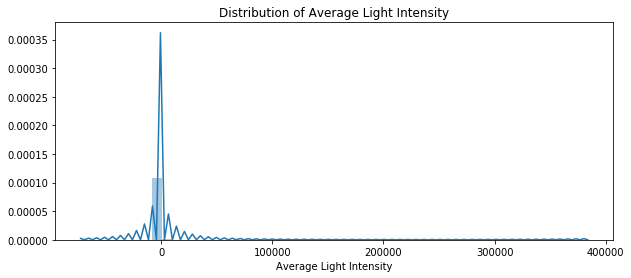

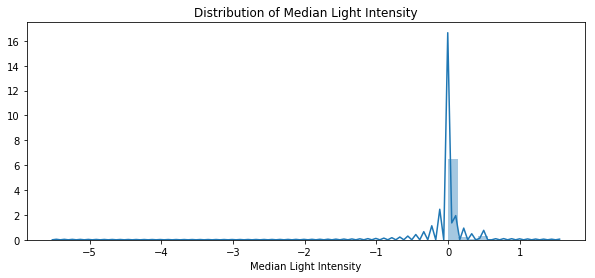

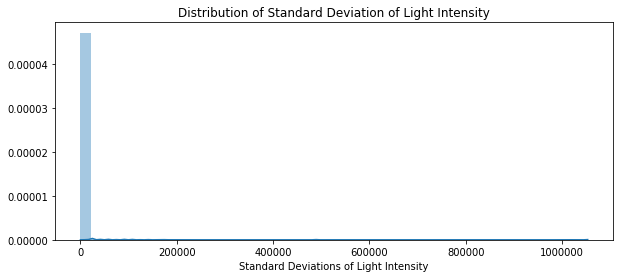

In [10]:
plt.figure(figsize=(10,4))
sns.distplot(star_mean)
plt.title('Distribution of Average Light Intensity')
plt.xlabel('Average Light Intensity')
plt.show()

plt.figure(figsize=(10,4))
sns.distplot(star_median)
plt.title('Distribution of Median Light Intensity')
plt.xlabel('Median Light Intensity')
plt.show()

plt.figure(figsize=(10,4))
sns.distplot(star_stdev)
plt.title('Distribution of Standard Deviation of Light Intensity')
plt.xlabel('Standard Deviations of Light Intensity')
plt.show()

In [11]:
exoplanet_means = train[train.LABEL == 2].apply('mean', axis=1)
non_exoplanet_means = train[train.LABEL == 1].apply('mean', axis=1)

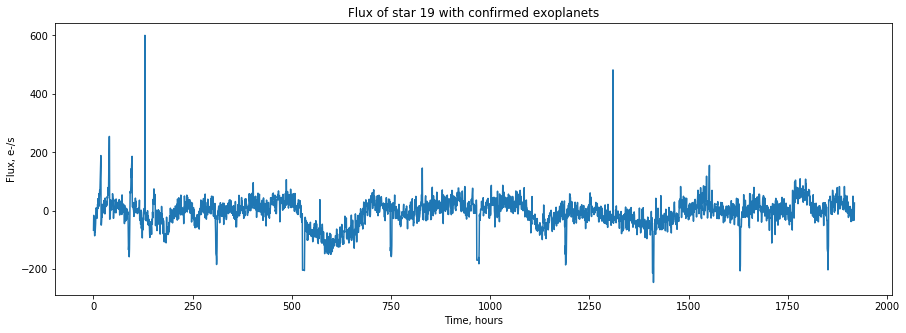

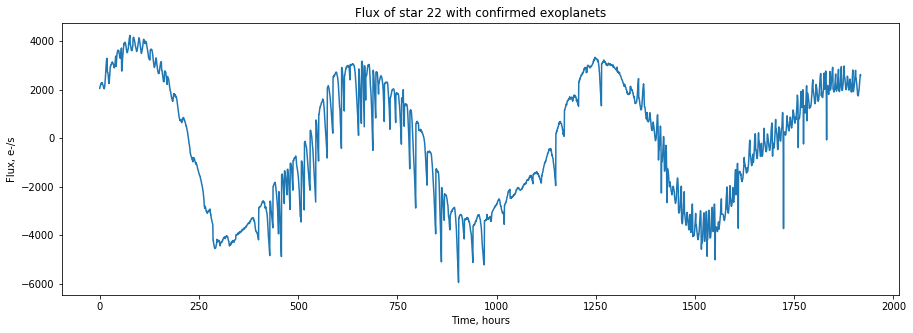

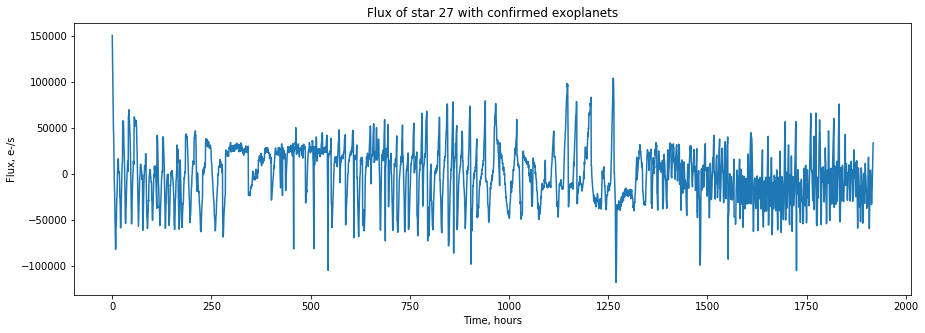

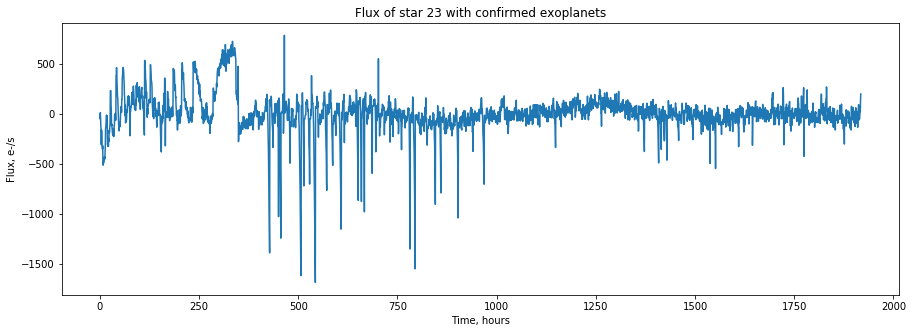

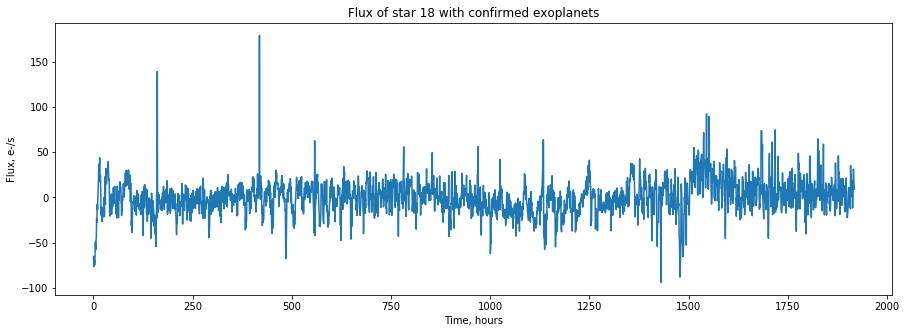

In [12]:
# Obtaining flux for several stars with exoplanets from the train data:
for i in np.random.choice(range(0, len(train[train.LABEL == 2])), size=5):
    flux = train[train.LABEL == 2].drop('LABEL', axis=1).iloc[i,:]
    time = np.arange(len(flux)) * (36.0/60.0) # time in units of hours
    plt.figure(figsize=(15,5))
    plt.title('Flux of star {} with confirmed exoplanets'.format(i+1))
    plt.ylabel('Flux, e-/s')
    plt.xlabel('Time, hours')
    plt.plot(time, flux)

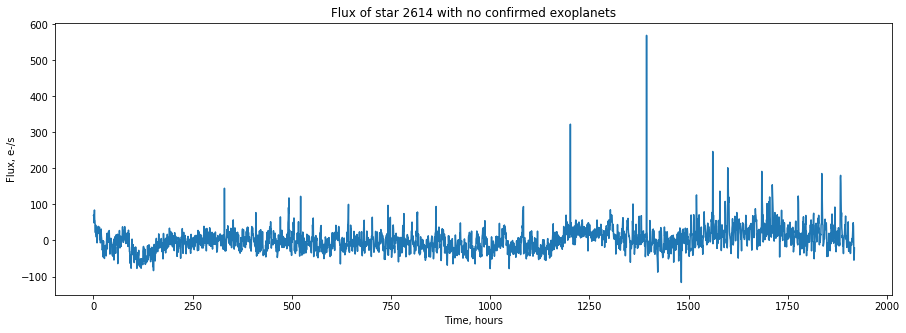

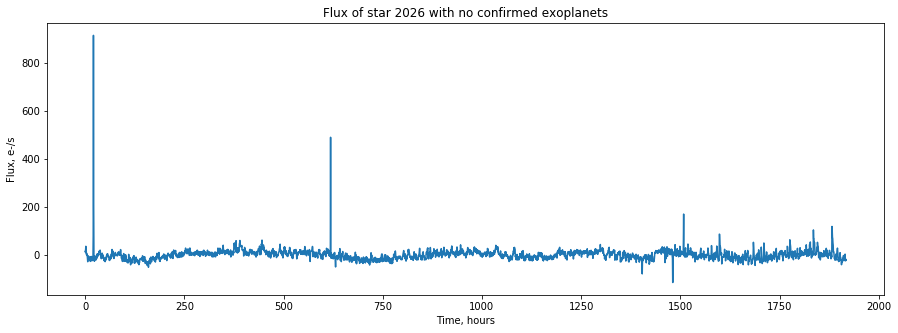

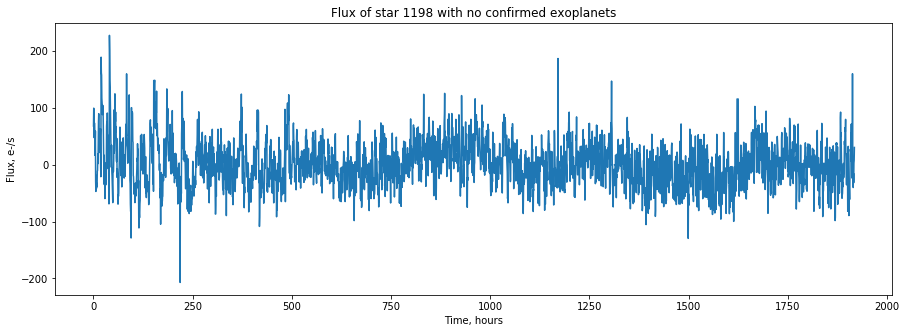

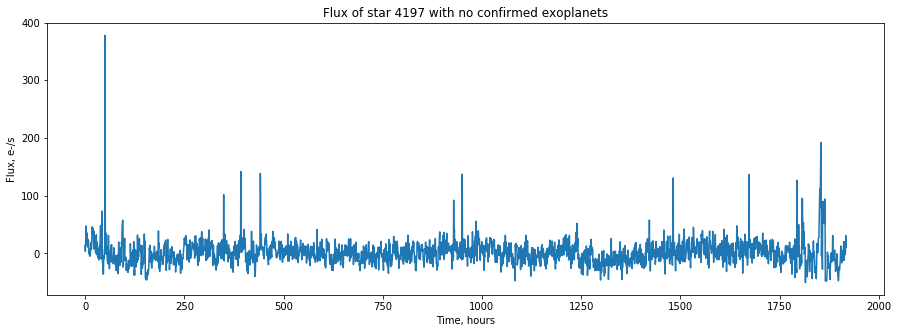

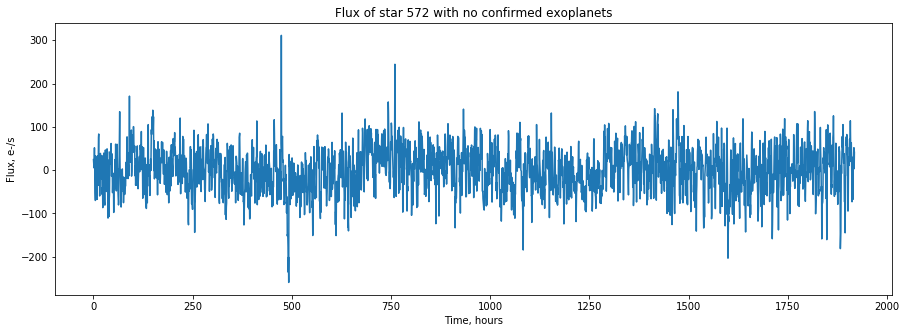

In [13]:
# Obtaining flux for several stars with NO exoplanets from the train data:
for i in np.random.choice(range(0, len(train[train.LABEL == 1])), size=5):
    flux = train[train.LABEL == 1].drop('LABEL', axis=1).iloc[i,:]
    time = np.arange(len(flux)) * (36.0/60.0) # time in units of hours
    plt.figure(figsize=(15,5))
    plt.title('Flux of star {} with no confirmed exoplanets'.format(i+1))
    plt.ylabel('Flux, e-/s')
    plt.xlabel('Time, hours')
    plt.plot(time, flux)

### Feature Engineering
---
Seems like at this point, due to the huge differences in flux from stars (even within each category), I need to normalize the curves to better compare/predict. One way to do that would be FFT, but that's costly, another way is to gaussian smooth each star and then subtract `normal_flux - smooth_flux`.

* Actually, after digging around, turns out `scipy` has a package `ndimage` which can do a quick and easy FFT on this flux data, will go forward with that. 

In [14]:
from scipy import ndimage, signal, stats

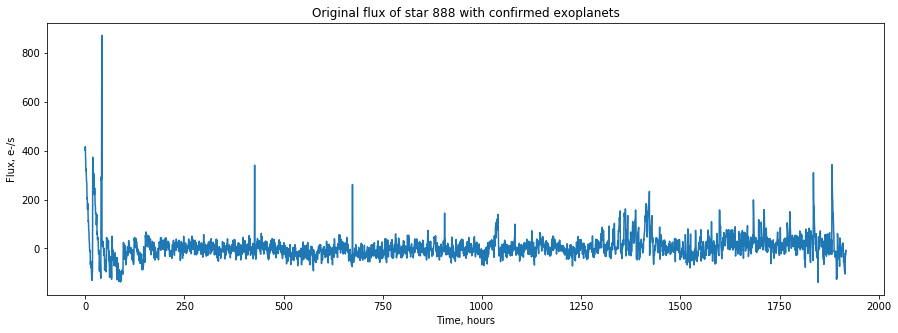

In [15]:
# chosing a random star to  attempt smoothing
i = np.random.choice(range(0, len(train)))
flux_reg = train.drop('LABEL', axis=1).iloc[i,:]

time = np.arange(len(flux_reg)) * (36.0/60.0) # time in units of hours
plt.figure(figsize=(15,5))
plt.title('Original flux of star {} with confirmed exoplanets'.format(i+1))
plt.ylabel('Flux, e-/s')
plt.xlabel('Time, hours')
plt.plot(time, flux_reg)
plt.show()

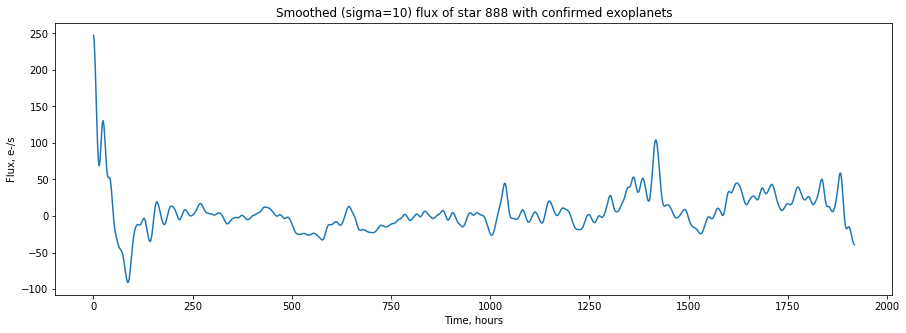

In [16]:
flux_smooth = ndimage.gaussian_filter(flux_reg, sigma=10) 
# sigma=1 does very little, and past sigma=10, it becomes too aggressive in smoothing

time = np.arange(len(flux_reg)) * (36.0/60.0) # time in units of hours
plt.figure(figsize=(15,5))
plt.title('Smoothed (sigma=10) flux of star {} with confirmed exoplanets'.format(i+1))
plt.ylabel('Flux, e-/s')
plt.xlabel('Time, hours')
plt.plot(time, flux_smooth)
plt.show()

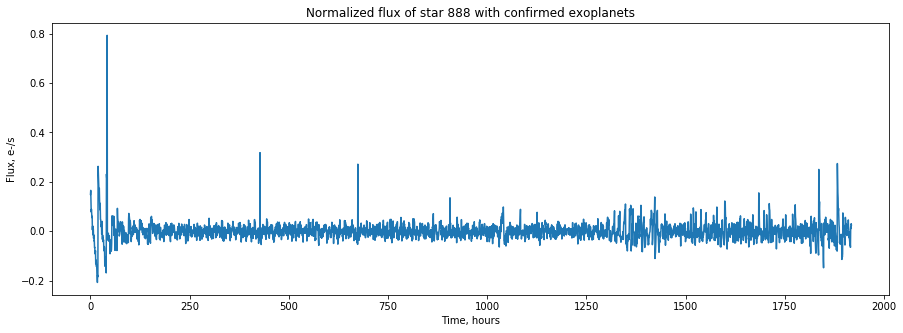

In [17]:
flux_norm = flux_reg - flux_smooth
flux_norm = (flux_norm-np.mean(flux_norm))/(np.max(flux_norm)-np.min(flux_norm))

time = np.arange(len(flux_reg)) * (36.0/60.0) # time in units of hours
plt.figure(figsize=(15,5))
plt.title('Normalized flux of star {} with confirmed exoplanets'.format(i+1))
plt.ylabel('Flux, e-/s')
plt.xlabel('Time, hours')
plt.plot(time, flux_norm)
plt.show()

In [18]:
# defining a function to use df.apply() over the entire training set

def flux_normalizer(rows):
    flux_reg = rows
    flux_smooth = ndimage.gaussian_filter(flux_reg, sigma=10)
    flux_norm_temp = flux_reg - flux_smooth
    flux_norm = (flux_norm_temp-np.mean(flux_norm_temp))/(np.max(flux_norm_temp)-np.min(flux_norm_temp))
    return flux_norm

In [19]:
train.iloc[:,1:] = train.iloc[:,1:].apply(flux_normalizer, axis=1)
test.iloc[:,1:] = test.iloc[:,1:].apply(flux_normalizer, axis=1)

In [20]:
train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.106403,0.100007,0.058134,0.027612,0.020326,-0.035103,-0.040581,-0.013007,-0.000332,...,-0.046745,-0.064083,-0.065208,0.018642,0.033445,0.062076,0.026078,0.040409,0.002601,-0.027266
1,2,0.041485,0.050703,0.003597,0.037446,-0.037595,-0.026886,-0.054623,-0.054545,-0.054560,...,0.007640,-0.047580,-0.048278,-0.035134,0.002010,0.012103,-0.011757,0.022125,0.039876,0.047170
2,2,0.036390,0.039271,0.018812,0.003153,-0.034190,-0.026011,-0.027999,-0.008730,-0.054926,...,-0.035135,0.042446,0.042538,0.003252,0.011593,0.035374,0.020106,0.004589,-0.032843,-0.057117
3,2,0.019349,0.081422,-0.052651,-0.065242,-0.006866,-0.021728,0.007249,-0.024948,-0.020675,...,0.038329,0.008620,0.007142,0.106338,0.075364,-0.022922,-0.012111,-0.038125,-0.038649,0.054377
4,2,-0.058758,-0.061891,-0.066326,-0.059138,-0.047121,-0.041884,-0.031973,-0.047753,-0.040327,...,-0.038013,0.038773,0.036134,0.052166,0.014349,0.014799,0.029481,0.034669,0.022747,-0.018448


### Testing Signal Processing using FFT
---
Here I reimport the train dataset to try to see if the `ndimage.fourier_gaussian()` function helps more than the `ndimage.gaussian_filter()`.

In [21]:
train_fft_test = pd.read_csv("./data/exoTrain.csv")

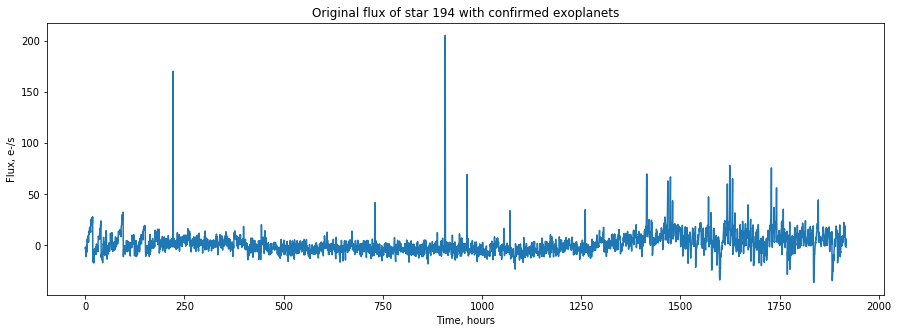

In [22]:
# chosing a random star to  attempt smoothing
i = np.random.choice(range(0, len(train_fft_test)))
flux_reg = train_fft_test.drop('LABEL', axis=1).iloc[i,:]

time = np.arange(len(flux_reg)) * (36.0/60.0) # time in units of hours
plt.figure(figsize=(15,5))
plt.title('Original flux of star {} with confirmed exoplanets'.format(i+1))
plt.ylabel('Flux, e-/s')
plt.xlabel('Time, hours')
plt.plot(time, flux_reg)
plt.show()

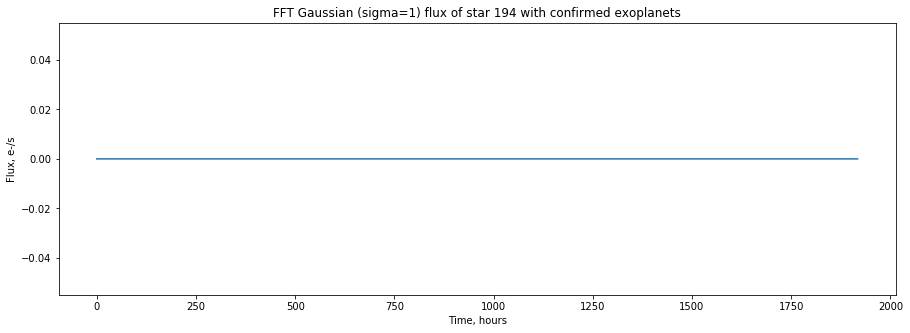

In [23]:
flux_smooth = ndimage.fourier_gaussian(flux_reg, sigma=1)

time = np.arange(len(flux_reg)) * (36.0/60.0) # time in units of hours
plt.figure(figsize=(15,5))
plt.title('FFT Gaussian (sigma=1) flux of star {} with confirmed exoplanets'.format(i+1))
plt.ylabel('Flux, e-/s')
plt.xlabel('Time, hours')
plt.plot(time, flux_smooth)
plt.show()

So clearly, I will be sticking with the `ndimage.gaussian_filter()` smoothing function to normalize my data..

### Modeling Portion
---
Due to the amount of features, I think I am going to start with an SVM with linear or radial (still unsure) kernel.

- Logistic Regression seems like a bad idea due to the amount of features, maybe with regularization it could be okay but I don't think so.
- Naive Bayes seems like the wrong idea since this is time series data, I don't think I can agree with the assumption that all features are independent of each other.

Also, one point to note: accuracy **will NOT** be a good measure of my model. Due to the heavy imbalance of classes in the train data (5050 vs 37, as shown below), I could get **~99.3%** by just saying that there are 0 exoplanets in total. Because of this, I must look at precision/recall, aka looking more at true and false positives more closely.

In [24]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

In [25]:
train.LABEL.value_counts()

1    5050
2      37
Name: LABEL, dtype: int64

Due to the imbalance of labels, I will use SMOTE on the training portion of data, to train the model before assessing the fit on the test data. The process will go as follows:

1. Test/train split on the data.
2. Use SMOTE on train data to train the model with better data on the exoplanet confirmed stars.
3. Test model using the test data that **does not** have any kind of upsampled label data.

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
X_test = train.drop('LABEL', axis=1)
y_test = train['LABEL']

In [28]:
print("Original train dataset shape:")
train['LABEL'].value_counts()

Original train dataset shape:


1    5050
2      37
Name: LABEL, dtype: int64

In [29]:
from collections import Counter

# creating and fitting the SMOTE object
sm_test = SMOTE(ratio="minority", random_state=0)
X_test_sm, y_test_sm = sm_test.fit_sample(X_test, y_test)

print("Using SMOTE, train dataset shape:")
Counter(y_test_sm)

Using SMOTE, train dataset shape:


Counter({2: 5050, 1: 5050})

In [30]:
def model_evaluator(X, y, model, n_splits=5, random_state=0):
    """
    Function used to evaluate a given model by doing a stratified test/train split, upsampling the train data
    with SMOTE, then testing the model on the untouched test data split. The splitting is performed default
    5 times with stratified KFold, with a 75/25% train/test split.
    
    Code as taken from https://www.kaggle.com/aleksod/0-75-precision-0-60-recall-linear-svc/notebook
    with slight modifications by me.
    """
    skf = StratifiedKFold(n_splits=n_splits, random_state=random_state)
    
    bootstrapped_accuracies = []
    bootstrapped_precisions = []
    bootstrapped_recalls    = []
    bootstrapped_f1s        = []
    
    SMOTE_accuracies = []
    SMOTE_precisions = []
    SMOTE_recalls    = []
    SMOTE_f1s        = []
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
                
        df_train    = X_train.join(y_train)
        df_planet   = df_train[df_train.LABEL == 2].reset_index(drop=True)
        df_noplanet = df_train[df_train.LABEL == 1].reset_index(drop=True)
        df_boot     = df_noplanet
                        
        index = np.arange(0, df_planet.shape[0])
        temp_index = np.random.choice(index, size=df_noplanet.shape[0])
        df_boot = df_boot.append(df_planet.iloc[temp_index])
        
        df_boot = df_boot.reset_index(drop=True)
        X_train_boot = df_boot.drop('LABEL', axis=1)
        y_train_boot = df_boot.LABEL
                    
        est_boot = model.fit(X_train_boot, y_train_boot)
        y_test_pred = est_boot.predict(X_test)
        
        bootstrapped_accuracies.append(accuracy_score(y_test, y_test_pred))
        bootstrapped_precisions.append(precision_score(y_test, y_test_pred, pos_label=2))
        bootstrapped_recalls.append(recall_score(y_test, y_test_pred, pos_label=2))
        bootstrapped_f1s.append(f1_score(y_test, y_test_pred, pos_label=2))
    
        sm = SMOTE(ratio="minority", random_state=random_state)
        X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
                    
        est_sm = model.fit(X_train_sm, y_train_sm)
        y_test_pred = est_sm.predict(X_test)
        
        SMOTE_accuracies.append(accuracy_score(y_test, y_test_pred))
        SMOTE_precisions.append(precision_score(y_test, y_test_pred, pos_label=2))
        SMOTE_recalls.append(recall_score(y_test, y_test_pred, pos_label=2))
        SMOTE_f1s.append(f1_score(y_test, y_test_pred, pos_label=2))
        
    print('\t\t\t Bootstrapped \t SMOTE')
    print("Average Accuracy:\t", "{:0.10f}".format(np.mean(bootstrapped_accuracies)),
          '\t', "{:0.10f}".format(np.mean(SMOTE_accuracies)))
    print("Average Precision:\t", "{:0.10f}".format(np.mean(bootstrapped_precisions)),
          '\t', "{:0.10f}".format(np.mean(SMOTE_precisions)))
    print("Average Recall:\t\t", "{:0.10f}".format(np.mean(bootstrapped_recalls)),
          '\t', "{:0.10f}".format(np.mean(SMOTE_recalls)))
    print("Average F1:\t\t", "{:0.10f}".format(np.mean(bootstrapped_f1s)),
          '\t', "{:0.10f}".format(np.mean(SMOTE_f1s)))

Here is the accuracy for the raw data, no kind of normalization:

In [31]:
raw_train = pd.read_csv('./data/exoTrain.csv')

X_base = raw_train.drop('LABEL', axis=1)
y_base = raw_train['LABEL']

In [32]:
model_evaluator(X_base, y_base, LinearSVC(), n_splits=10)

			 Bootstrapped 	 SMOTE
Average Accuracy:	 0.6858770478 	 0.6845002552
Average Precision:	 0.0139880284 	 0.0139561265
Average Recall:		 0.6083333333 	 0.6083333333
Average F1:		 0.0273349288 	 0.0272733712


And now on the normalized data, with the oscillations removed:

In [33]:
X_norm = train.drop('LABEL', axis=1)
y_norm = train['LABEL']

In [34]:
model_evaluator(X_norm, y_norm, LinearSVC(), n_splits=10)

			 Bootstrapped 	 SMOTE
Average Accuracy:	 0.9905647170 	 0.9905647170
Average Precision:	 0.3095238095 	 0.3095238095
Average Recall:		 0.2250000000 	 0.2250000000
Average F1:		 0.2297835498 	 0.2297835498


#### Further feature engineering: 
---
Even with 99% accuracy on the data that has been normalized, the precision and recall scores are not impressive. For further feature engineering, we can reduce any upper outliers by sorting and replacing 1% of the upper values with the mean of the 4 points on each side.

In [35]:
def reduce_upper_outliers(df,reduce = 0.01, half_width=4):
    '''
    Takes in the dataframe, and removes the top 1%, replacing it with the mean of 4 points
    on each side. The function is taken from here:
    https://www.kaggle.com/muonneutrino/exoplanet-data-visualization-and-exploration
    '''
    length = len(df.iloc[0,:])
    remove = int(length*reduce)
    for i in df.index.values:
        values = df.loc[i,:]
        sorted_values = values.sort_values(ascending = False)
        for j in range(remove):
            idx = sorted_values.index[j]
            new_val = 0
            count = 0
            idx_num = int(idx[5:])
            for k in range(2*half_width+1):
                idx2 = idx_num + k - half_width
                if idx2 <1 or idx2 >= length or idx_num == idx2:
                    continue
                new_val += values['FLUX.'+str(idx2)] # corrected from 'FLUX-' to 'FLUX.'
                
                count += 1
            new_val /= count # count will always be positive here
            if new_val < values[idx]: # just in case there's a few persistently high adjacent values
                df.set_value(i,idx,new_val)
        
            
    return df

In [36]:
train.iloc[:,1:] = reduce_upper_outliers(train.iloc[:,1:])
test.iloc[:,1:] = reduce_upper_outliers(test.iloc[:,1:])

In [37]:
X_reduced = train.drop('LABEL', axis=1)
y_reduced = train['LABEL']

In [38]:
model_evaluator(X_reduced, y_reduced, LinearSVC(), n_splits=10)

			 Bootstrapped 	 SMOTE
Average Accuracy:	 0.9880095293 	 0.9880095293
Average Precision:	 0.2522619048 	 0.2522619048
Average Recall:		 0.3416666667 	 0.3416666667
Average F1:		 0.2781313131 	 0.2781313131
